In [1]:
# libaries import 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from imblearn.over_sampling import SMOTE
from collections import Counter
import tensorflow as tf
from tensorflow import keras

In [2]:
# After data cleaning 
data = pd.read_csv('removed_na.csv', index_col=[0])
data.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


# Attribute Notations

#### Male: 0 = No; 1 = Yes

#### Age: Age at exam time

#### Education : 1 = School; 2 = High School; 3 =  College;  4 = University

#### CurrentSmoker: 0 = nonsmoker; 1 = smoker

#### CigsPerDay: Number of cigarettes smoked in a day

#### BPMeds: 0 = Not on Blood Pressure medications; 1 = Is on Blood Pressure medications

#### PrevalentStroke: 0 = No; 1 = Yes

#### PrevalentHyp: 0 = No; 1 = Yes

#### Diabetes: 0 = No; 1 = Yes

#### TotChol: Total cholesterol level (mg/dL)

#### SysBP: Systolic blood pressure (mmHg)

#### DiaBP: Diastolic blood pressure (mmHg)

#### BMI: Body Mass Index

#### HeartRate: Beats/Min (Ventricular)

#### Glucose: Glucose level (mg/dl)

#### TenYearCHD: Risk of coronary heart disease CHD (0 = No 1 = Yes)

In [3]:
# See if there are any null values    
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [5]:
#  Observe the data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3681 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3681 non-null   int64  
 1   age              3681 non-null   int64  
 2   education        3681 non-null   float64
 3   currentSmoker    3681 non-null   int64  
 4   cigsPerDay       3681 non-null   float64
 5   BPMeds           3681 non-null   float64
 6   prevalentStroke  3681 non-null   int64  
 7   prevalentHyp     3681 non-null   int64  
 8   diabetes         3681 non-null   int64  
 9   totChol          3681 non-null   float64
 10  sysBP            3681 non-null   float64
 11  diaBP            3681 non-null   float64
 12  BMI              3681 non-null   float64
 13  heartRate        3681 non-null   float64
 14  glucose          3681 non-null   float64
 15  TenYearCHD       3681 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 488.9 KB


# Visualization of heart diesease datasets

(16.5, -0.5)

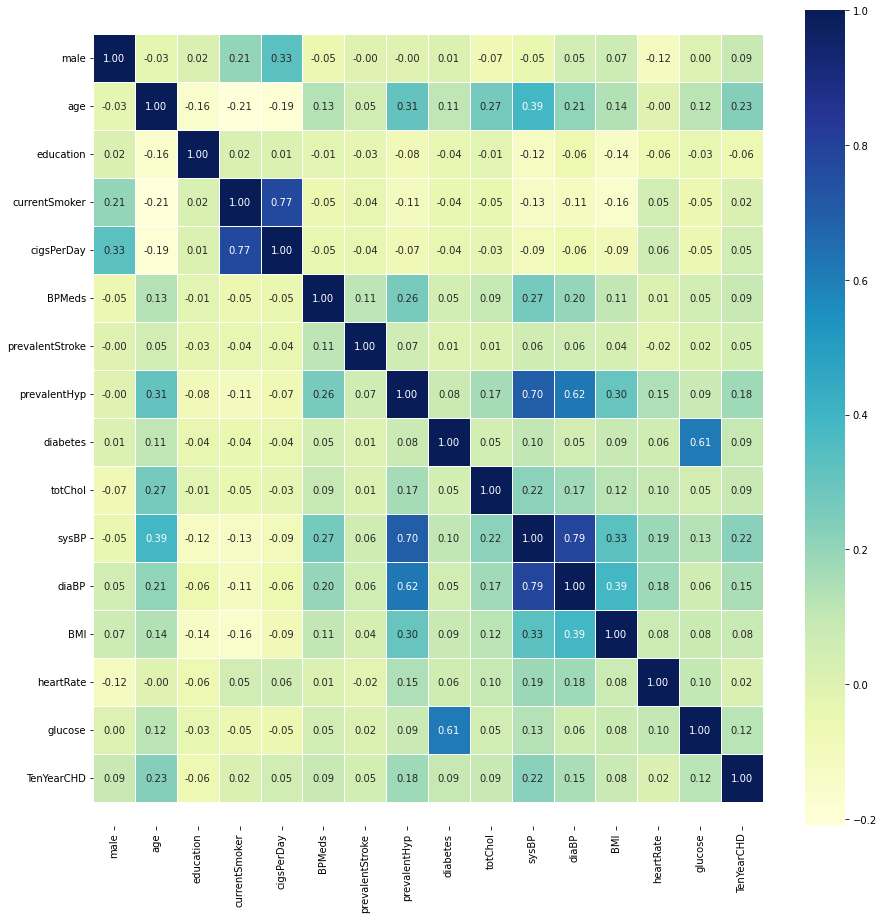

In [6]:
# Visualizing in correlation matrix 
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

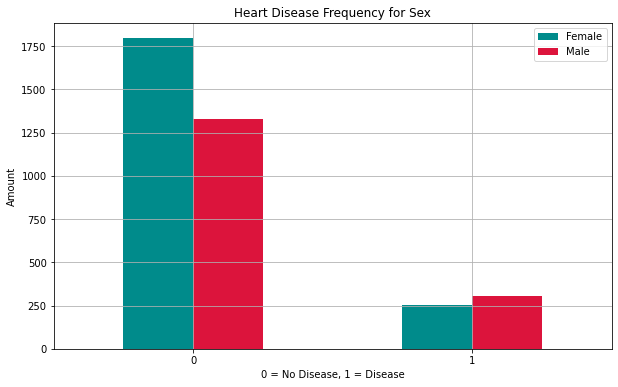

In [7]:
# Visualization of having heart disease and not having heart disease in male and female
pd.crosstab(data.TenYearCHD,data.male).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['darkcyan','crimson']);

plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.grid()
plt.xticks(rotation = 0);

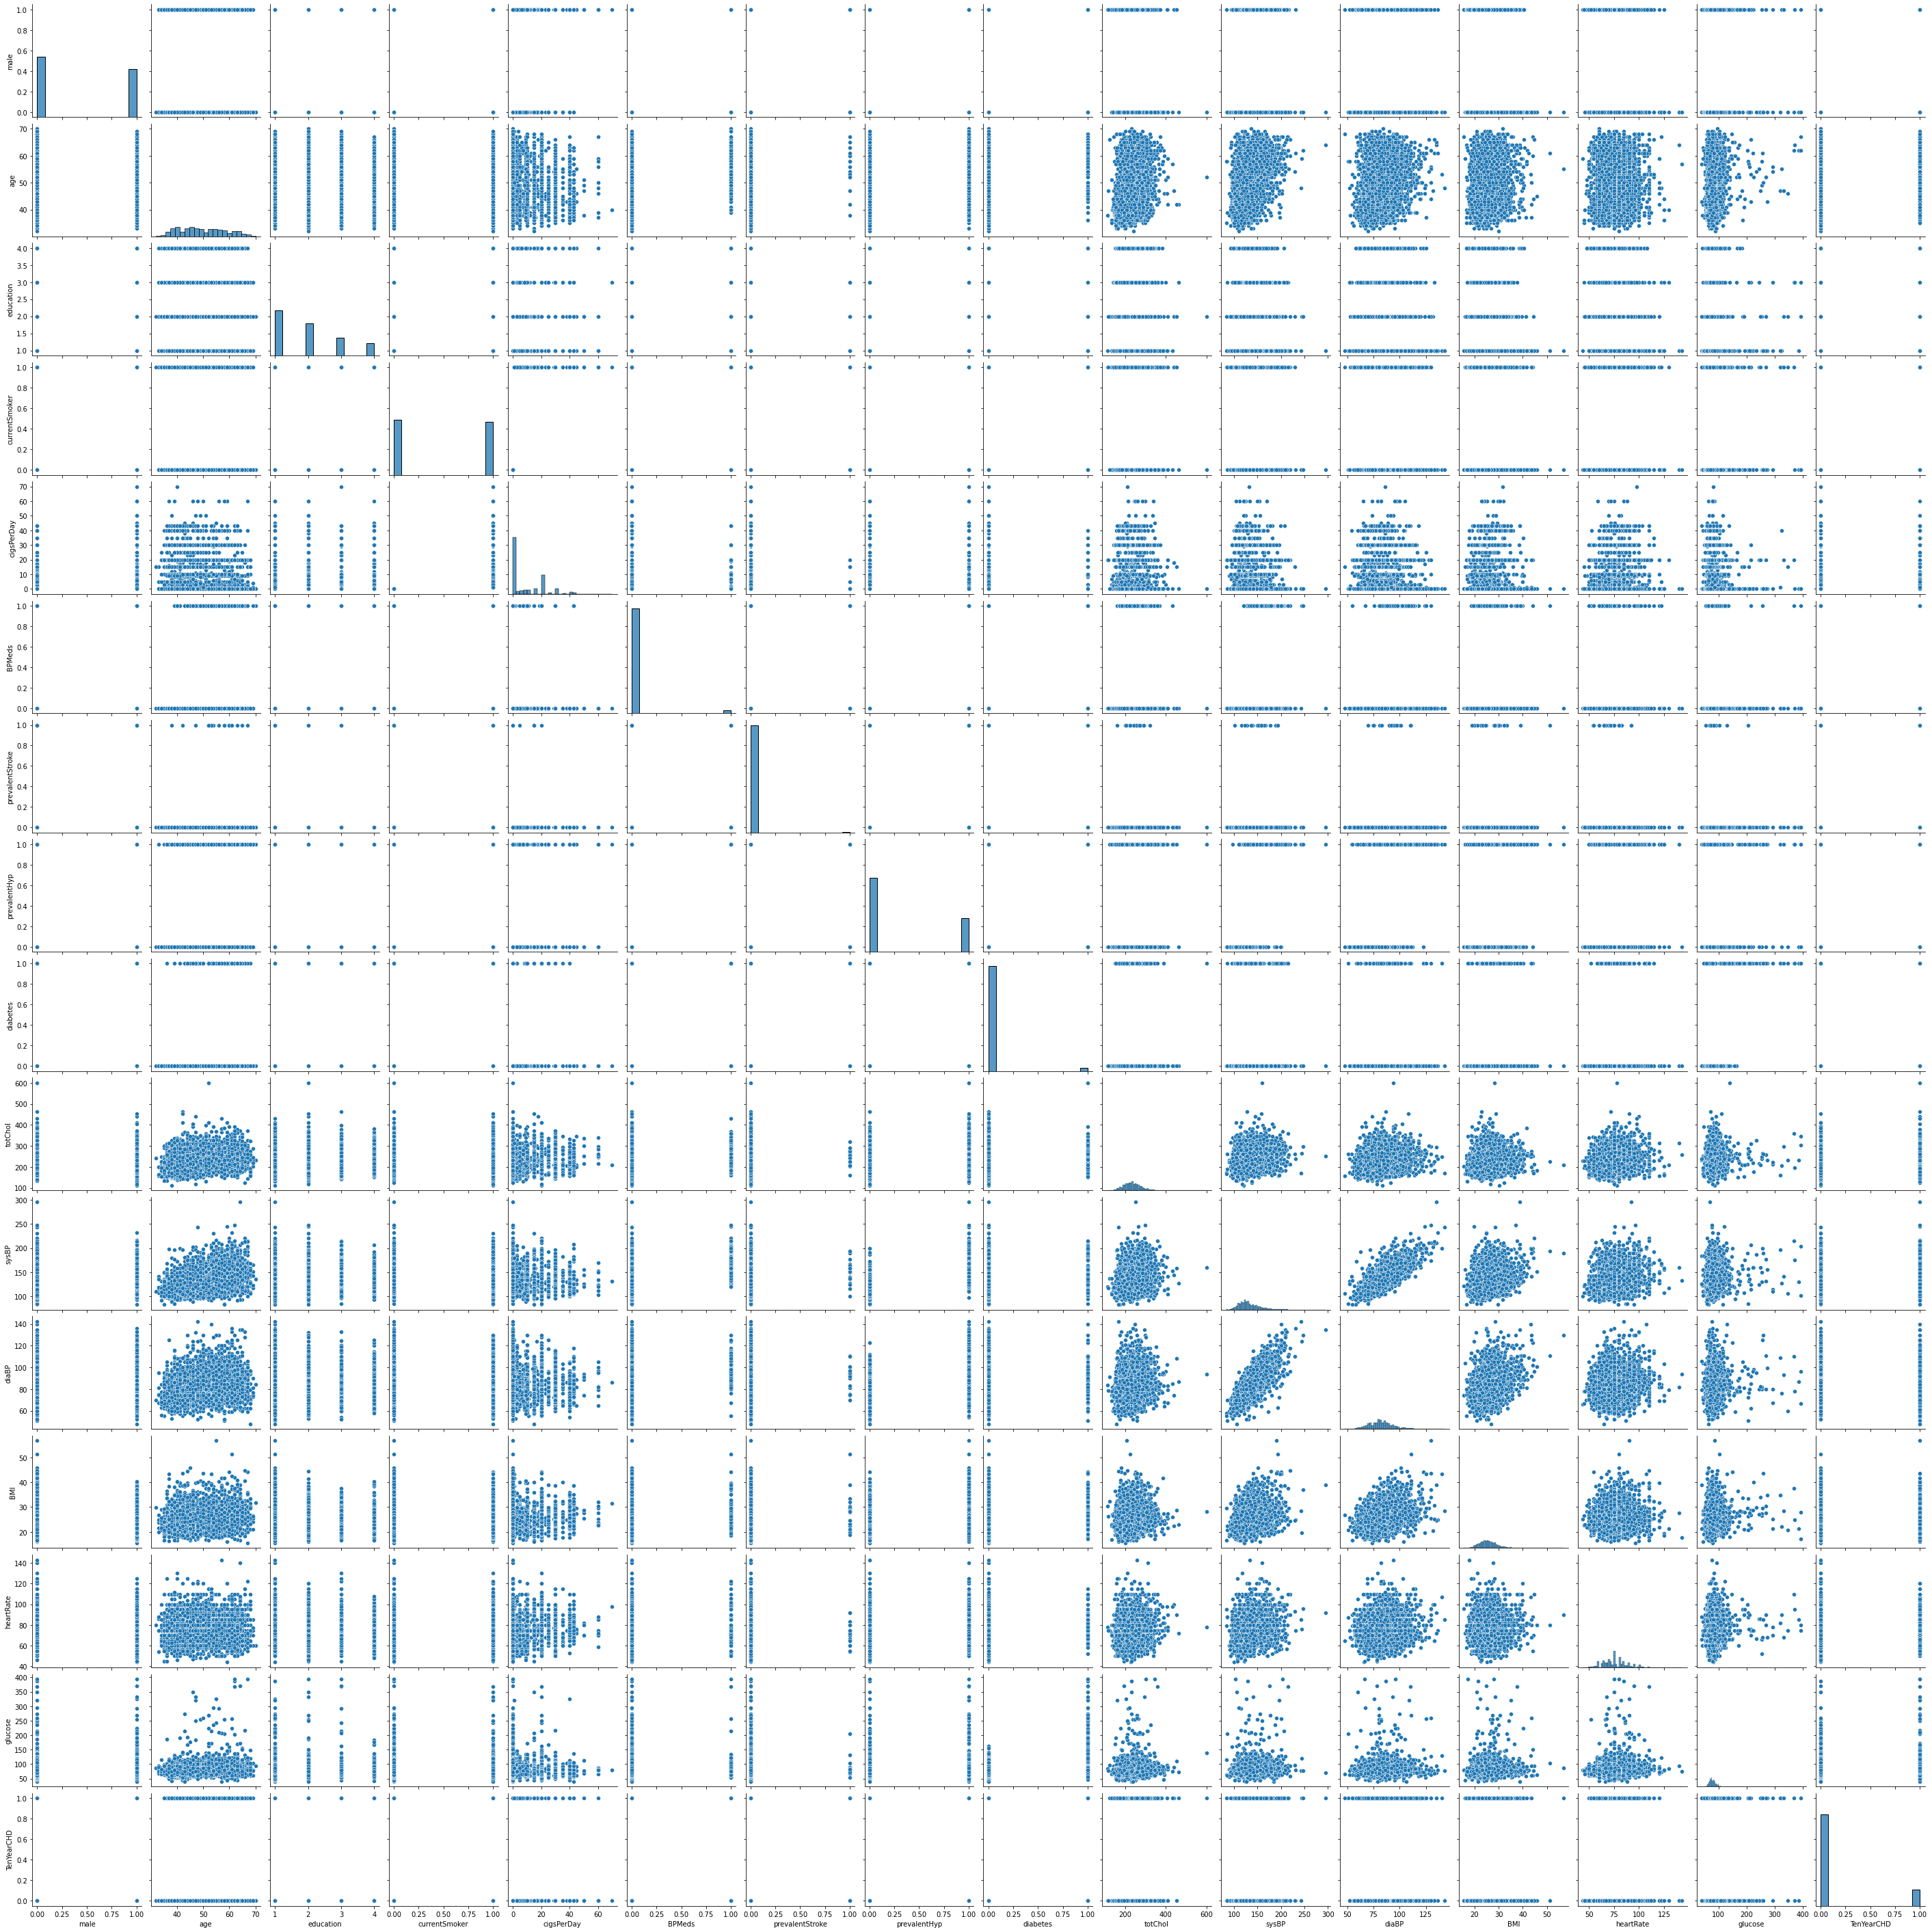

In [8]:
# Visualization of every attribute in dataset
sns.pairplot(data=data)

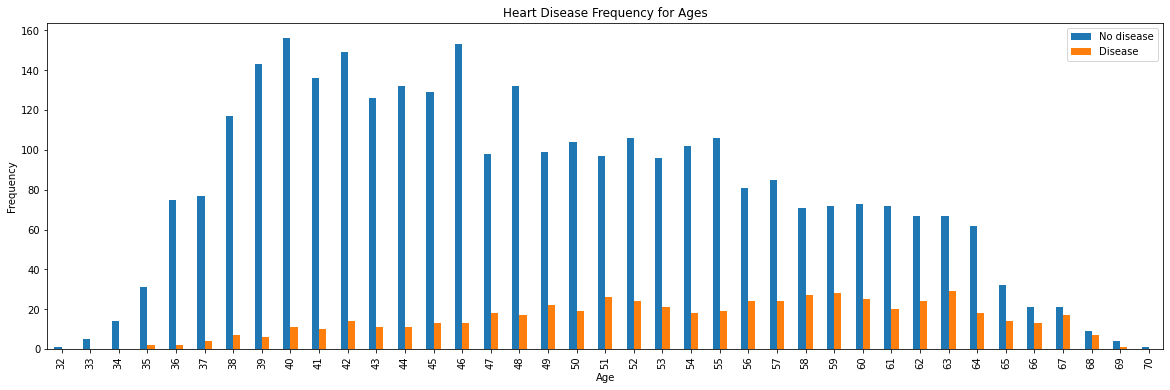

In [18]:
# Visualization of having heart disease and not having heart disease in different age factor
pd.crosstab(data.age,data.TenYearCHD).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['No disease','Disease'])
plt.show()

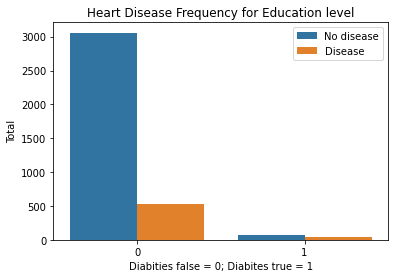

In [17]:
# Visualization of having heart disease and not having heart disease 
sns.countplot(x='diabetes',hue='TenYearCHD',data=data,)
plt.title('Heart Disease Frequency for Education level')
plt.xlabel('Diabities false = 0; Diabites true = 1')
plt.ylabel('Total')
plt.legend(['No disease','Disease'])


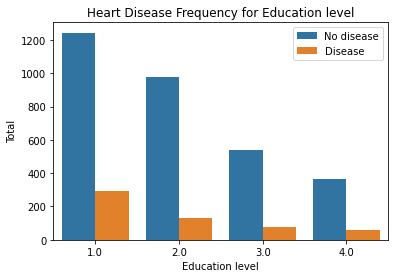

In [16]:
# Visualization of heart disease and not having heart disease in different education levels 
sns.countplot(x='education',hue='TenYearCHD',data=data,)
plt.title('Heart Disease Frequency for Education level')
plt.xlabel('Education level')
plt.ylabel('Total')
plt.legend(['No disease','Disease'])


Text(0.5, 0, 'CurrentSmoker = 0; Not currentSmoker = 1')

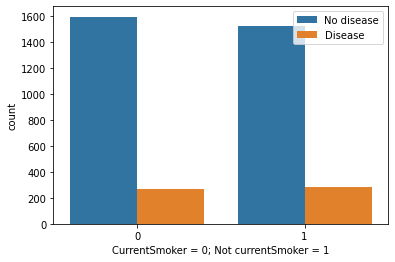

In [15]:
# Visualization of smoker having and not having heart disease
sns.countplot(x='currentSmoker',hue='TenYearCHD',data=data)
plt.legend(['No disease','Disease'])
plt.xlabel('CurrentSmoker = 0; Not currentSmoker = 1')

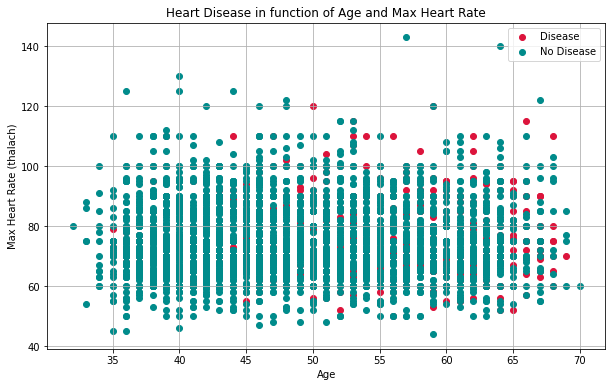

In [20]:
# Visualization of having heart disease and not having heart disease in respect to Age and maxinum heart rate
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(data.age[data.TenYearCHD==1],
            data.heartRate[data.TenYearCHD==1],
           color='crimson')


# Scatter with negative examples
plt.scatter(data.age[data.TenYearCHD==0],
           data.heartRate[data.TenYearCHD==0],
           color='darkcyan')

# Adding info
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (thalach)')
plt.legend(["Disease", "No Disease"]);
plt.grid()

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

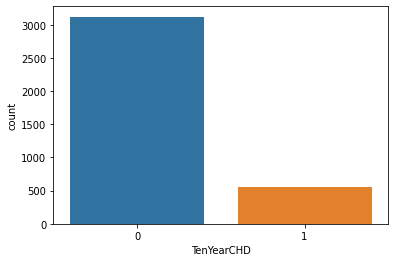

In [21]:
# Visualizing total heart disease patients and non-heart disease patients
sns.countplot(data['TenYearCHD'])

The blue bar (0) indicates the total number of patient not having heart disease and the orange bar (1) indicates total number of patient having heart disease

# Testing different machine learning algorithm

In [58]:
target = data['TenYearCHD']
features = data.drop(columns = 'TenYearCHD', axis=1)
# data scaling
scaler = MinMaxScaler()
scaled_feature = scaler.fit_transform(features)

In [59]:
# data spliting
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.30, stratify= target,random_state=5)

# Before oversampling data

In [60]:
# Before
print("Before oversampling, count of label '1' : {} ".format(sum(y_train == 1)))
print("Before oversampling, count of label '0' : {} ".format(sum(y_train == 0)))

Before oversampling, count of label '1' : 391 
Before oversampling, count of label '0' : 2185 


Since patient not having heart disease case is much higher than the patient having heart disease case. The dataset found to be biased dataset. So to minimize the bised dataset oversampling method has been used.

  ## As part of research this document shows how oversampling techniques be used in machine learning

# Using SMOTE technique (Synthetic Minority Oversampling Technique)

In [61]:
#  Using SMOTE technique for oversampling data
from imblearn.over_sampling import RandomOverSampler
smote = SMOTE(sampling_strategy=0.5, random_state=100)
X_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)

# After oversampling data

In [62]:
# After
print("After oversampling, count of label '1' : {} ".format(sum(y_train_sm == 1)))
print("After oversampling, count of label '0' : {} ".format(sum(y_train_sm == 0)))

After oversampling, count of label '1' : 1092 
After oversampling, count of label '0' : 2185 


In [63]:
st_x = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)

# KNN (K-Nearest Neighbors) algorithm 

In [64]:
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier = classifier.fit(X_train_sm,y_train_sm)
knn_y_pred = classifier.predict(X_test)
#check accuracy
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print('KNN Accuracy: {:.2f}'.format(knn_accuracy))

KNN Accuracy: 0.78


In [65]:
test_score_knn = accuracy_score(y_test, classifier.predict(X_test)) * 100
train_score_knn = accuracy_score(y_train_sm, classifier.predict(X_train_sm)) * 100

results_df = pd.DataFrame(data=[["K-nearest neighbors", train_score_knn, test_score_knn]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,K-nearest neighbors,86.328959,78.371041


## Confusion matrix of KNN 

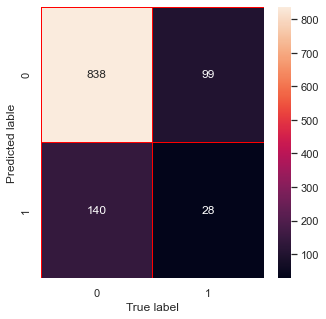

In [66]:
# Confusion matrix of test result
cm_knn = confusion_matrix(y_test, knn_y_pred)
f, ax =plt.subplots(figsize = (5,5))
sns.heatmap(cm_knn,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("True label")
plt.ylabel("Predicted lable")
plt.show()

In [67]:
# printing the report of train and test of KNN
pred_train = classifier.predict(X_train_sm)
pred_test = classifier.predict(X_test)
print("Train results")
print(f"Accuracy Score: {accuracy_score(y_train_sm,pred_train ) * 100:.2f}%")
print(classification_report(y_train_sm, pred_train))
print("--------------------------")
print(f"Confusion matrix: \n {confusion_matrix(y_train_sm, pred_train)}\n")
print("==========================")
print("Test results")
print(f"Accuracy Score: {accuracy_score(y_test,pred_test ) * 100:.2f}%")
print(classification_report(y_test, pred_test))
print("--------------------------")
print(f"Confusion matrix: \n {confusion_matrix(y_test, pred_test)}\n")

Train results
Accuracy Score: 86.33%
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2185
           1       0.89      0.67      0.77      1092

    accuracy                           0.86      3277
   macro avg       0.87      0.82      0.83      3277
weighted avg       0.87      0.86      0.86      3277

--------------------------
Confusion matrix: 
 [[2097   88]
 [ 360  732]]

Test results
Accuracy Score: 78.37%
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       937
           1       0.22      0.17      0.19       168

    accuracy                           0.78      1105
   macro avg       0.54      0.53      0.53      1105
weighted avg       0.76      0.78      0.77      1105

--------------------------
Confusion matrix: 
 [[838  99]
 [140  28]]



## ROC Curve for KNN

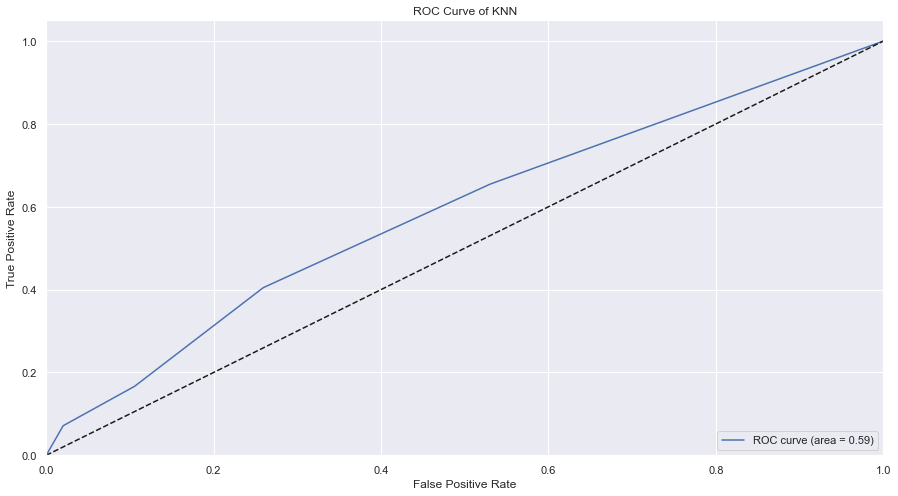

In [68]:
prediction = classifier.predict_proba(X_test)
fpr,tpr, threshold=roc_curve(y_test,prediction[:,1], pos_label=1)
roc_auc = auc(fpr,tpr)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of KNN')
plt.legend(loc="lower right")
plt.show()

# Random Forest algorithm

In [69]:
randomForest = RandomForestClassifier()
randomForest.fit(X_train_sm, y_train_sm)
rf_y_pred = randomForest.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Classifier Accuracy: {:.2f}".format(rf_accuracy))

Random Forest Classifier Accuracy: 0.83


In [70]:
test_score_rf = accuracy_score(y_test, randomForest.predict(X_test)) * 100
train_score_rf = accuracy_score(y_train_sm, randomForest.predict(X_train_sm)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest", train_score_rf, test_score_rf]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\thapa\AppData\Local\Temp\ipykernel_3456\969986869.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,K-nearest neighbors,86.328959,78.371041
1,Random Forest,100.000000,82.805430


## Confusion matrix of Random Forest

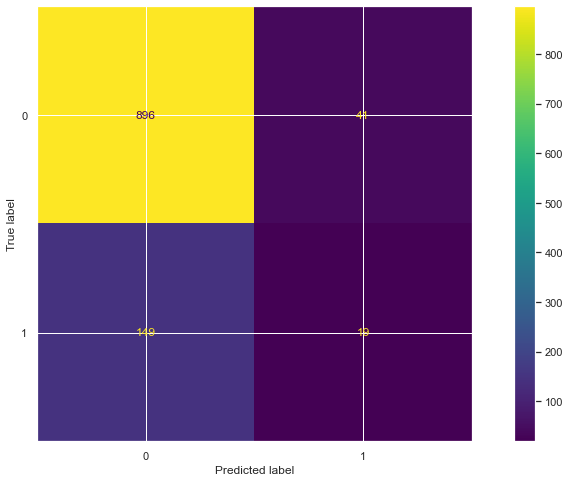

In [71]:
# Confusion matrix pf test result
# Plot the confusion matrix in graph
cm_rf = confusion_matrix(y_test,rf_y_pred, labels=classifier.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=classifier.classes_)
disp.plot()

# showing the matrix
plt.show()

In [72]:
# printing the report of train and test of random forest
pred_train = randomForest.predict(X_train_sm)
pred_test = randomForest.predict(X_test)
print("Train results")
print(f"Accuracy Score: {accuracy_score(y_train_sm,pred_train ) * 100:.2f}%")
print(classification_report(y_train_sm, pred_train))
print("--------------------------")
print(f"Confusion matrix: \n {confusion_matrix(y_train_sm, pred_train)}\n")
print("==========================")
print("Test results")
print(f"Accuracy Score: {accuracy_score(y_test,pred_test ) * 100:.2f}%")
print(classification_report(y_test, pred_test))
print("--------------------------")
print(f"Confusion matrix: \n {confusion_matrix(y_test, pred_test)}\n")

Train results
Accuracy Score: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2185
           1       1.00      1.00      1.00      1092

    accuracy                           1.00      3277
   macro avg       1.00      1.00      1.00      3277
weighted avg       1.00      1.00      1.00      3277

--------------------------
Confusion matrix: 
 [[2185    0]
 [   0 1092]]

Test results
Accuracy Score: 82.81%
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       937
           1       0.32      0.11      0.17       168

    accuracy                           0.83      1105
   macro avg       0.59      0.53      0.54      1105
weighted avg       0.78      0.83      0.79      1105

--------------------------
Confusion matrix: 
 [[896  41]
 [149  19]]



## ROC curve of Random Forests

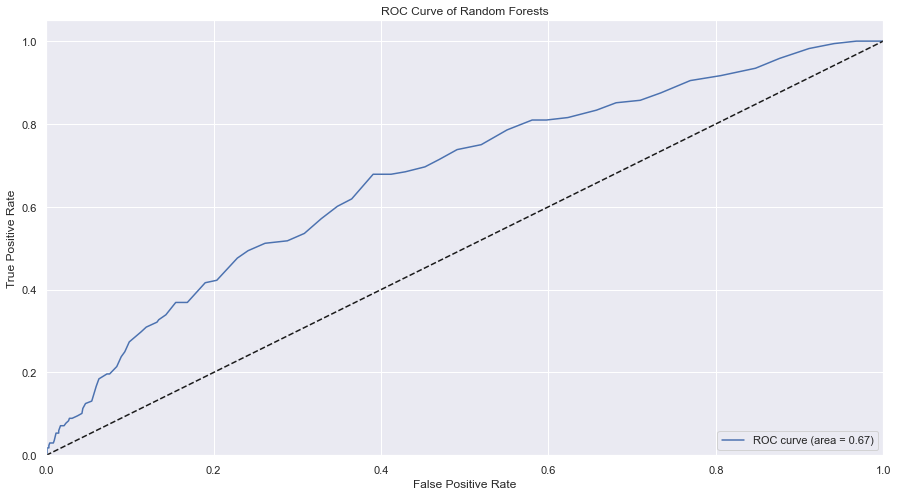

In [73]:
 # fpr,tpr,_=roc_curve(y_test,y_pred)
prediction1 = randomForest.predict_proba(X_test)
fpr1,tpr1, threshold1=roc_curve(y_test,prediction1[:,1], pos_label=1)
roc_auc1 = auc(fpr1,tpr1)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr1, tpr1, label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Random Forests')
plt.legend(loc="lower right")
plt.show()

# Naive Bayes algorithm

### Using Gaussian Naive Bayes 

In [74]:
#Basic Naive Bayes
Gnb = GaussianNB()
Gnb.fit(X_train_sm, y_train_sm)
gnb_y_pred = Gnb.predict(X_test)
gnb_acc = accuracy_score(y_test, gnb_y_pred)
print("Naive Bayes Classifier Accuracy: {:.2f}".format(gnb_acc))

Naive Bayes Classifier Accuracy: 0.79


# Final output of training and testing accuracy of machine learning models

In [75]:
test_score_nv = accuracy_score(y_test, Gnb.predict(X_test)) * 100
train_score_nv = accuracy_score(y_train_sm, Gnb.predict(X_train_sm)) * 100

results_df_2 = pd.DataFrame(data=[["Naive Bayes", train_score_nv, test_score_nv]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\thapa\AppData\Local\Temp\ipykernel_3456\3110079101.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,K-nearest neighbors,86.328959,78.371041
1,Random Forest,100.000000,82.805430
2,Naive Bayes,69.270674,79.457014


## Confusion matrix of Naive Bayes

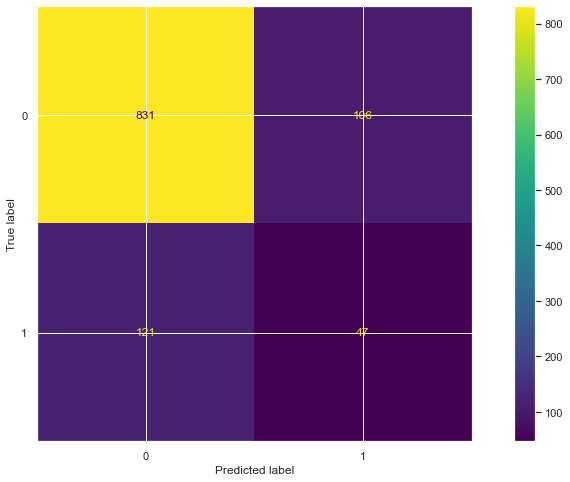

In [76]:
# Confusion matrix of test result
cm_gnb = confusion_matrix(y_test,gnb_y_pred, labels=Gnb.classes_)

# ploting with labels
disp_gnb = ConfusionMatrixDisplay(confusion_matrix=cm_gnb, display_labels=Gnb.classes_)
disp_gnb.plot()

# showing the matrix
plt.show()

In [77]:
# printing the report
pred_train = Gnb.predict(X_train_sm)
pred_test = Gnb.predict(X_test)
print("Train results")
print(f"Accuracy Score: {accuracy_score(y_train_sm,pred_train ) * 100:.2f}%")
print(classification_report(y_train_sm, pred_train))
print("--------------------------")
print(f"Confusion matrix: \n {confusion_matrix(y_train_sm, pred_train)}\n")
print("===========================")
print("Test results")
print(f"Accuracy Score: {accuracy_score(y_test,pred_test ) * 100:.2f}%")
print(classification_report(y_test, pred_test))
print("--------------------------")
print(f"Confusion matrix: \n {confusion_matrix(y_test, pred_test)}\n")

Train results
Accuracy Score: 69.27%
              precision    recall  f1-score   support

           0       0.72      0.88      0.79      2185
           1       0.57      0.31      0.40      1092

    accuracy                           0.69      3277
   macro avg       0.65      0.60      0.60      3277
weighted avg       0.67      0.69      0.66      3277

--------------------------
Confusion matrix: 
 [[1933  252]
 [ 755  337]]

Test results
Accuracy Score: 79.46%
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       937
           1       0.31      0.28      0.29       168

    accuracy                           0.79      1105
   macro avg       0.59      0.58      0.59      1105
weighted avg       0.79      0.79      0.79      1105

--------------------------
Confusion matrix: 
 [[831 106]
 [121  47]]



## ROC curve of Naive Bayes

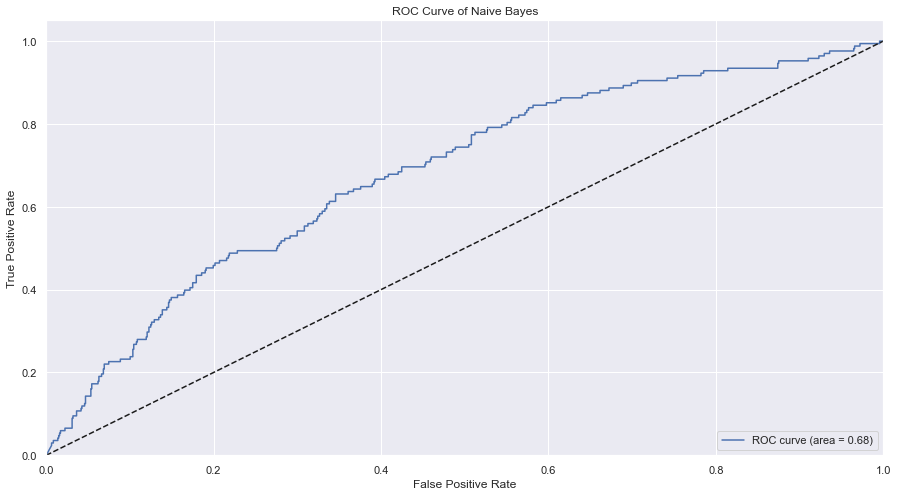

In [78]:
prediction2 = Gnb.predict_proba(X_test)
fpr2,tpr2, threshold2=roc_curve(y_test,prediction2[:,1], pos_label=1)
roc_auc2 = auc(fpr2,tpr2)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr2, tpr2, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Naive Bayes')
plt.legend(loc="lower right")
plt.show()

# Visualization of different train accuracy of machine learning algorithms in barchart

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Train score'>

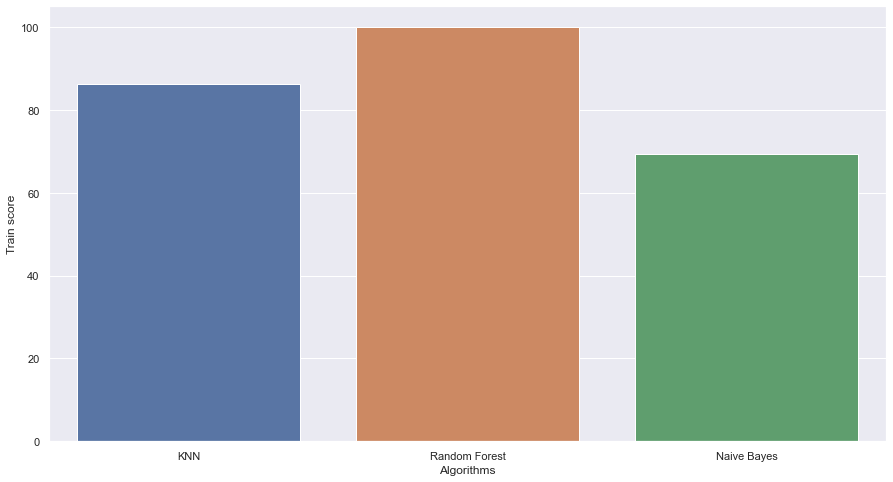

In [79]:

algorithms = ["KNN", "Random Forest", "Naive Bayes"]
scores = [train_score_knn, train_score_rf, train_score_nv]
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Train score")
sns.barplot(algorithms,scores)

# Visualization of different test accuracy of machine learning algorithms in barchart

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Test score'>

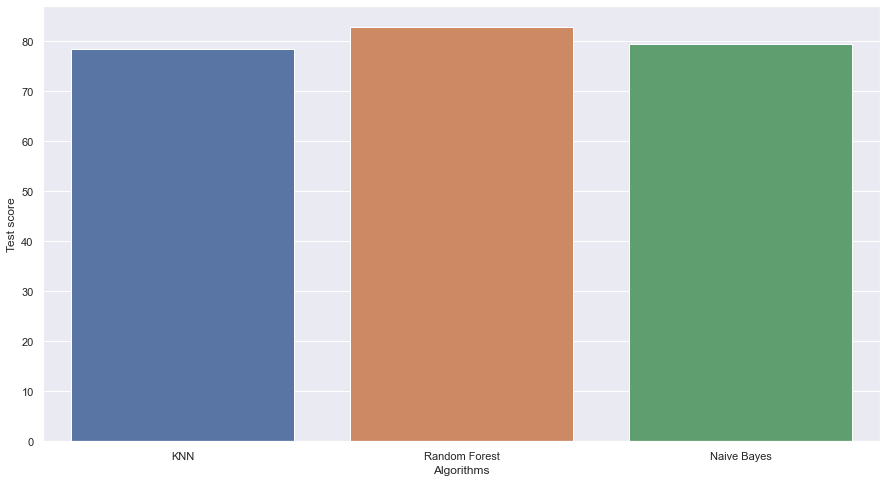

In [80]:

algorithms = ["KNN", "Random Forest", "Naive Bayes"]
scores = [test_score_knn, test_score_rf, test_score_nv]
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Test score")
sns.barplot(algorithms,scores)

Hence form comparision of training and testing of 3 diffirent machine learning algorithm. It is found that traning accuracy of random forest preformed best among KNN and Naive Bayes machine learning algorithm. During the testing accuracy of the machine learning models, Random forest provided better accuracy among KNN and Naive Bayes. This concludes that the Random Forest the best for this dataset. 

 ## Testing Random Forest in real data
 #### Health information provided into the function 
male, age, educatuib, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose

In [81]:
# Creating function to predict the if the patient have heart disease or not
def heart_data( male, age, education, currentSmoker,cigsPerDay, BPMeds, prevalentStroke, prevalentHyp,diabetes, totChol, sysBP,
            diaBP, BMI,heartRate, glucose):
    try: 
      input = (male, age, education, currentSmoker,cigsPerDay, BPMeds, prevalentStroke, prevalentHyp,diabetes, totChol, sysBP, 
               diaBP, BMI,heartRate, glucose)
      input_as_numpy = np.asarray(input)
      input_reshaped=input_as_numpy.reshape(1,-1)
      predict_data=randomForest.predict(input_reshaped)
      if(predict_data[0] == 1): 
        return "The patient seems to have heart disease:("
      else:
        return "The patient seems to be Normal:"
    except Exception as e:
      return e 

## Testing 
### Case 1: Having heart disease data

In [82]:
print(heart_data(0,61,3,1,30,0,0,1,0,225,150,95,28.58,65,103))

The patient seems to have heart disease:(


### Case 2: Having normal data

In [83]:
print(heart_data(0,46,3,1,23,0,0,0,0,285,130,84,23.1,85,85))

The patient seems to be Normal:
